In [1]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
import math
import pylab as py
import sys
import numpy.ma as ma
from decimal import Decimal
import os
from importlib import reload
import h5py
import pixie_read_st as pxr

In [2]:
filepath = "/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_visc_neg.scratch/pixie3d.h5"

In [3]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [4]:
pxr.pixieload(filepath)

timesteps= 42
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'T=Te+Ti', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'V.(b x grad(psi))', 'V.grad(psi)', 'V||', 'chi', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1 pert', 'B^2 pert', 'B^3 pert', 'P^1 pert', 'P^2 pert', 'P^3 pert', 'Rho pert', 'p=pi+pe pert']


In [47]:
E_1 = pxr.load_array(3,0,None,None)

In [48]:
E_1.shape

(129, 66, 34, 114)

In [11]:
B3 = pxr.load_array(1,2,None,None)

In [17]:
B3.shape

(128, 65, 33, 41)

In [13]:
B3 = pxr.periodicity(B3)

In [15]:
B3 = pxr.f2c_angles(B3)

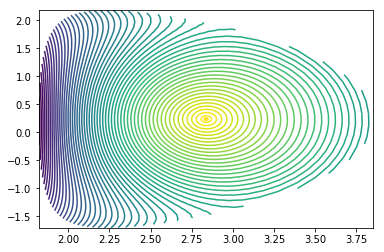

In [16]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B3[:,:,0,0],60)
plt.show()

In [18]:
B3.tofile('B3.bin')

In [20]:
B3[87,42,20,5]

-1.7033295798911652

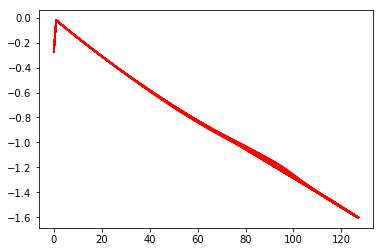

In [46]:
plt.plot(R,B3[:,0,0,0],'b--')
for t in range(114):
    plt.plot(R,B3[:,0,0,t],'r')
plt.show()

In [5]:
pol_flux = pxr.load_array(3,4,None,None) 

In [38]:
pol_flux.shape

(128, 65, 33, 114)

In [7]:
pol_flux = pxr.f2c(pol_flux)

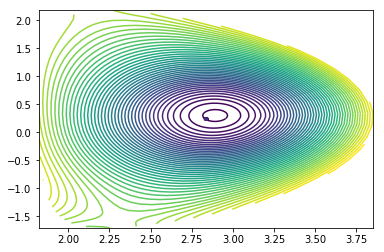

In [11]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pol_flux[:,:,0,0],60)
plt.show()

In [12]:
R = [x for x in range(128)]

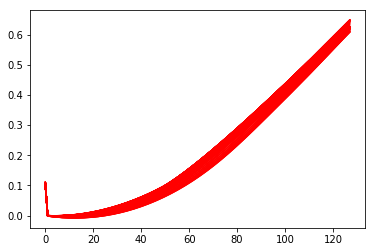

In [22]:
plt.plot(R,pol_flux[:,0,0,0],'b--')
for t in range(114):
    plt.plot(R,pol_flux[:,0,0,t],'r')
plt.show()

In [5]:
Temp = pxr.load_array(3,5,None,None)

In [8]:
Temp.shape

(128, 65, 33, 114)

In [7]:
Temp = pxr.f2c(Temp)

In [9]:
rho = pxr.load_array(0,13,None,None)

In [12]:
rho.shape

(128, 65, 33, 114)

In [11]:
rho = pxr.f2c(rho)

In [16]:
P = np.multiply(Temp,rho)

In [13]:
J_phi = pxr.load_array(2,5,None,None)

In [14]:
J_phi.shape

(128, 65, 33, 114)

## Contour Plots

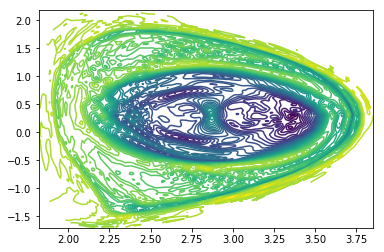

In [22]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],J_phi[:,:,0,100],50)
plt.show()

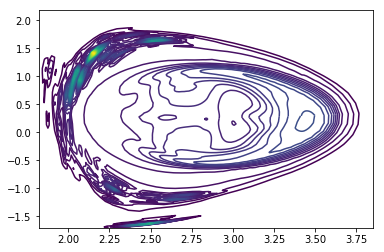

In [20]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],P[:,:,0,100],50)
plt.show()

## n-Fourier components

In [23]:
J_tilda = pxr.fft_in_phi(J_phi)

In [24]:
P_tilda = pxr.fft_in_phi(P)

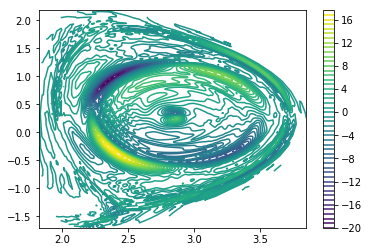

In [34]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],J_tilda[:,:,1,100].imag,60)
plt.colorbar()
plt.show()

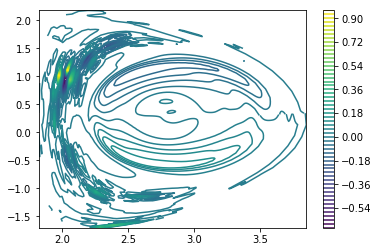

In [36]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],P_tilda[:,:,1,100].imag,60)
plt.colorbar()
plt.show()

In [33]:
J_tilda1 = pxr.fft_in_phi(J_phi,70)

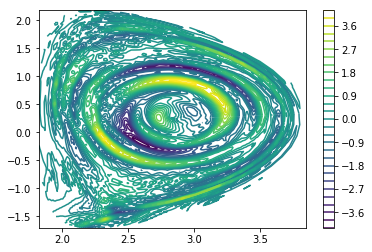

In [34]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],J_tilda1[:,:,1].imag,30)
plt.colorbar()
plt.show()

In [23]:
q = pxr.load_array(3,16,None,None)

In [24]:
q.shape

(129, 66, 34, 114)

In [25]:
q = pxr.f2c(q)

In [26]:
R = [x for x in range(q.shape[0])]

In [27]:
t = [x for x in range(q.shape[3])]

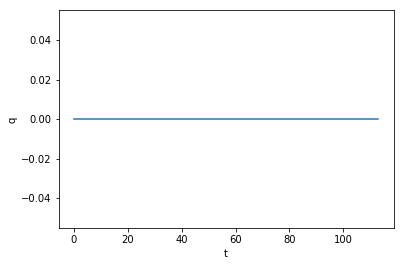

In [30]:
plt.plot(t,q[105,0,0,:])
plt.xlabel('t')
plt.ylabel('q')
plt.show()